In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup 

In [2]:
data = pd.read_csv("Balkan_Langs.csv")

In [3]:
balkan_langs = data.drop('Country', 1)
balkan_langs['Main Language'] = [i.lower() for i in balkan_langs['Main Language']]   
balkan_langs['Main Language'] = [i[3:] for i in balkan_langs['Main Language']]    
drop = balkan_langs['Minority Language'].dropna()

In [4]:
list = []
for i in drop:
    i = i.split(",")
    for j in i:
        j = j.lower()
        j = j[3:]
        list.append(j)
minority = pd.DataFrame( {"name" : list})
minority = minority.drop_duplicates()

In [5]:
new = []
for i in minority['name']: 
    new.append(i)
for j in balkan_langs['Main Language']:
    new.append(j)    
two = []
for i in new: 
    i = i.replace('(official)', '')
    two.append(i)

In [6]:
x = pd.Series(two)
unique = pd.DataFrame(x)
unique = unique[unique != ' other']
unique = unique[unique != 'other']
unique = unique[unique != ' unspecified']
unique = unique[unique != ' other and unspecified']
unique.drop_duplicates()
unique = unique.dropna()
unique[0] = [i.replace(" ", "") for i in unique[0]]
unique[0] = [i.replace("%", "") for i in unique[0]]
unique = unique.drop_duplicates()

In [7]:
unique = unique.rename(columns = {0:'unique_langs'})
balkan = data.drop(columns=['Unnamed: 0','Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'https://en.wikipedia.org/wiki/Balkans'])
balkan.columns = ['country', 'main_lang%', 'minority']

In [8]:
''' 
Below I'm trying to see if I can import the text I found in different languages using Beautiful Soup. 
It seems to work! This is the data that I will be donig a lot of work on because it is large in size. 
'''
a = open('alb01.sgm')
data= a.read()
soup = BeautifulSoup(data)


Text(0.5, 1.0, 'Percentage of People Who Speak Main Language')

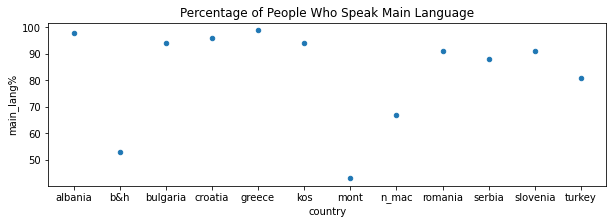

In [9]:
bm = balkan.loc[:, ('country', 'main_lang%')]
bm.loc[:, ('country')] = bm.loc[:, ('country')].str.lower()
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace(' ', '_', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('bosnia_and_herzegovina', 'b&h', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('north_macedonia', 'n_mac', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('kosovo', 'kos', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('montenegro', 'mont', regex=True)
bm.loc[:, ('main_lang%')] = bm.loc[:, ('main_lang%')].apply(lambda x: x[:2])
bm['main_lang%'] = [int(i) for i in bm['main_lang%']]

bm.plot(x ='country', y='main_lang%', kind = 'scatter', figsize =(10,3))
plt.title("Percentage of People Who Speak Main Language")


In [10]:
unique = unique.sort_values(by='unique_langs')
print(unique)
print("Number of unique langauges spoken by more than 1% of a nation: {}".format(unique.shape[0]))


      unique_langs
11        albanian
8          bosnian
21       bulgarian
2         croatian
23           greek
15       hungarian
17         kurdish
26      macedonian
10     montenegrin
5           romani
27        romanian
1          serbian
16  serbo-croatian
29         slovene
4          turkish
Number of unique langauges spoken by more than 1% of a nation: 15


In [11]:
albanian = pd.read_csv("Albanian.csv")
bulgarian = pd.read_csv("Bulgarian.csv")
greek = pd.read_csv("Greek.csv")
hungarian = pd.read_csv("Hungarian.csv")
romanian = pd.read_csv("Romanian.csv")

albanian = albanian[['Name', 'Parameter']]
bulgarian = bulgarian[['Name', 'Parameter']]
greek = greek[['Name', 'Parameter']]
hungarian = hungarian[['Name', 'Parameter']]
romanian = romanian[['Name', 'Parameter']]

In [12]:
print(romanian)
print(albanian)
print(greek)
print(hungarian)
print(bulgarian)

            Name       Parameter
0           lume           world
1        pami_nt     earth, land
2         t_ar__     earth, land
3           praf            dust
4        pulbere            dust
...          ...             ...
1224      stafie  ghost, phantom
1225     spectru  ghost, phantom
1226    fantoma_  ghost, phantom
1227       augur   omen, portent
1228  prevestire   omen, portent

[1229 rows x 2 columns]
                 Name       Parameter
0               'bot_           world
1                  _e           world
2     r_okul_i a'l_em           world
3              du_'_a           world
4               'tok_     earth, land
...               ...             ...
1972          l_u'gat  ghost, phantom
1973          'k_ipul  ghost, phantom
1974       kuku'vrik_  ghost, phantom
1975            o'gur   omen, portent
1976             v_ng   omen, portent

[1977 rows x 2 columns]
                   Name           Parameter
0     'kosmos ['kozmos]               world
1         

### After looking at these, I want to zoom in on the words for "dust" in these languages.
I also have noticed that special characters have been replaced with underscores, which will make this very difficult.

In [13]:
print("Romanian:{}\n".format(romanian.loc[romanian['Parameter'] == 'dust']))
print("Hungarian:{}\n".format(hungarian.loc[hungarian['Parameter'] == 'dust']))
print("Albanian:{}\n".format(albanian.loc[albanian['Parameter'] == 'dust']))
print("Bulgarian:{}\n".format(bulgarian.loc[bulgarian['Parameter'] == 'dust']))
print("Greek:{}\n".format(greek.loc[greek['Parameter'] == 'dust']))

Romanian:      Name Parameter
3     praf      dust
4  pulbere      dust

Hungarian:  Name Parameter
4  por      dust

Albanian:      Name Parameter
8  'pluhur      dust

Bulgarian:   Name Parameter
4  prax      dust

Greek:     Name Parameter
5  'skoni      dust



## Observations:
As you can see, all languages here except for Greek share the letters "p" and "r" in the word for dust. A few use the "a" vowel and a few use the "u" vowel. 

## Plan:
There are a few things I want to do. I want to find some way to organize this data and find relevant trends. I also need to figure out what I will do about the underscores that are replacing special characters. I need to figure out how I will group data and figure out what kinds of words they are using in this dictionary and also how I will group them together. I would also like to create some Python functions that help me with this and return values that I can use for these trends. This will be a lot of work, but I'm passionate about this so I'm not too worried.

In [14]:
print(romanian)

            Name       Parameter
0           lume           world
1        pami_nt     earth, land
2         t_ar__     earth, land
3           praf            dust
4        pulbere            dust
...          ...             ...
1224      stafie  ghost, phantom
1225     spectru  ghost, phantom
1226    fantoma_  ghost, phantom
1227       augur   omen, portent
1228  prevestire   omen, portent

[1229 rows x 2 columns]


In [15]:
print(hungarian)
print(bulgarian)
print(albanian)

          Name           Parameter
0        világ               world
1         föld         earth, land
2         föld  earth=ground, soil
3        talay  earth=ground, soil
4          por                dust
...        ...                 ...
1625  varázsló     sorcerer, witch
1626    b_vész     sorcerer, witch
1627   szellem          fairy, elf
1628  kísértet      ghost, phantom
1629    el_yel       omen, portent

[1630 rows x 2 columns]
                       Name           Parameter
0                    svját               world
1                    zemjá         earth, land
2                    zemjá  earth=ground, soil
3                   póčva  earth=ground, soil
4                      prax                dust
...                     ...                 ...
1995  proklínam/ prokəlná               curse
1996                 kəlná               curse
1997              [póstja]           fast (vb)
1998                  nebé              heaven
1999                 [ráj]

In [16]:
romanian = romanian.rename(columns = {'Name': 'Romanian'})

In [17]:
bulgarian = bulgarian.rename(columns = {'Name': 'Bulgarian'})
albanian = albanian.rename(columns = {'Name': 'Albanian'})
hungarian = hungarian.rename(columns = {'Name': 'Hungarian'})

In [18]:
print(romanian)
print(bulgarian)
print(hungarian)
print(albanian)

        Romanian       Parameter
0           lume           world
1        pami_nt     earth, land
2         t_ar__     earth, land
3           praf            dust
4        pulbere            dust
...          ...             ...
1224      stafie  ghost, phantom
1225     spectru  ghost, phantom
1226    fantoma_  ghost, phantom
1227       augur   omen, portent
1228  prevestire   omen, portent

[1229 rows x 2 columns]
                  Bulgarian           Parameter
0                    svját               world
1                    zemjá         earth, land
2                    zemjá  earth=ground, soil
3                   póčva  earth=ground, soil
4                      prax                dust
...                     ...                 ...
1995  proklínam/ prokəlná               curse
1996                 kəlná               curse
1997              [póstja]           fast (vb)
1998                  nebé              heaven
1999                 [ráj]              heaven

[2

In [19]:
r_dash = []

for i in romanian['Parameter']:
    if i.find('/') != -1:
        r_dash.append(i)
    else:
        pass
  

In [20]:
print(r_dash)

[]


In [21]:
bulgarian['Bulgarian'] = [i.replace('_', '') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('-', '') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('(', '') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace(')', '') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('[', '') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace(']', '') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace(', ', '/') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('=', '/') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('á', 'a') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('č', 'c') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('ó', 'o') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('í', 'i') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('ə', 'a') for i in bulgarian['Bulgarian']]
bulgarian['Bulgarian'] = [i.replace('é', 'e') for i in bulgarian['Bulgarian']]



In [22]:
print(bulgarian)

                Bulgarian           Parameter
0                   svjat               world
1                   zemja         earth, land
2                   zemja  earth=ground, soil
3                   pocva  earth=ground, soil
4                    prax                dust
...                   ...                 ...
1995  proklinam/ prokalna               curse
1996                kalna               curse
1997               postja           fast (vb)
1998                 nebe              heaven
1999                  raj              heaven

[2000 rows x 2 columns]


Now that I have done this for 2 langauges, I want to create two functions that can perform a universal data cleaning for me. 

In [23]:


def clean_words(df, parameter):
    """ takes in dataframe, string of parameter"""
    df[parameter] = [i.replace("(vb)", '') for i in df[parameter]]
    df[parameter] = [i.replace('_', '') for i in df[parameter]]
    df[parameter] = [i.replace('-', '') for i in df[parameter]]
    df[parameter] = [i.replace('(', '') for i in df[parameter]]
    df[parameter] = [i.replace(')', '') for i in df[parameter]]
    df[parameter] = [i.replace('[', '') for i in df[parameter]]
    df[parameter] = [i.replace(']', '') for i in df[parameter]]
    df[parameter] = [i.replace(' ', '') for i in df[parameter]]
    df[parameter] = [i.replace(',', '/') for i in df[parameter]]
    df[parameter] = [i.replace('=', '/') for i in df[parameter]]
    df[parameter] = [i.replace('á', 'a') for i in df[parameter]]
    df[parameter] = [i.replace('č', 'c') for i in df[parameter]]
    df[parameter] = [i.replace('ó', 'o') for i in df[parameter]]
    df[parameter] = [i.replace('í', 'i') for i in df[parameter]]
    df[parameter] = [i.replace('ə', 'a') for i in df[parameter]]
    df[parameter] = [i.replace('é', 'e') for i in df[parameter]]
    df[parameter] = [i.replace('î', 'i') for i in df[parameter]]
    df[parameter] = [i.replace('ă', 'a') for i in df[parameter]]
    df[parameter] = [i.replace('â', 'i') for i in df[parameter]]
    df[parameter] = [i.replace('ț', 't') for i in df[parameter]]
    df[parameter] = [i.replace('ș', 'ș') for i in df[parameter]]
    df[parameter] = [i.replace('ö', 'o') for i in df[parameter]]
    df[parameter] = [i.replace('ő', 'o') for i in df[parameter]]
    df[parameter] = [i.replace('ú', 'u') for i in df[parameter]]
    df[parameter] = [i.replace('ü', 'u') for i in df[parameter]]
    df[parameter] = [i.replace('ű', 'u') for i in df[parameter]]
    df[parameter] = [i.replace('ç', 's') for i in df[parameter]]
    df[parameter] = [i.replace("'", '') for i in df[parameter]]
    df[parameter] = [i.replace("á", 'a') for i in df[parameter]]
    df[parameter] = [i.replace("ó", 'o') for i in df[parameter]]
    df[parameter] = [i.replace("í", 'i') for i in df[parameter]]
    df[parameter] = [i.replace("é", 'e') for i in df[parameter]]
    df[parameter] = [i.replace("š", 's') for i in df[parameter]]
    df[parameter] = [i.replace("c̷", 'c') for i in df[parameter]]
    df[parameter] = [i.replace("ž", 'z') for i in df[parameter]]
    df[parameter] = [i.replace("ú", 'u') for i in df[parameter]]
    df[parameter] = [i.replace("0", '') for i in df[parameter]]
    df[parameter] = [i.replace("1", '') for i in df[parameter]]
    df[parameter] = [i.replace("2", '') for i in df[parameter]]
    df[parameter] = [i.replace("3", '') for i in df[parameter]]
    df[parameter] = [i.replace("4", '') for i in df[parameter]]
    df[parameter] = [i.replace("5", '') for i in df[parameter]]
    df[parameter] = [i.replace("6", '') for i in df[parameter]]
    df[parameter] = [i.replace("7", '') for i in df[parameter]]
    df[parameter] = [i.replace("8", '') for i in df[parameter]]
    df[parameter] = [i.replace("9", '') for i in df[parameter]]
    df[parameter] = [re.sub(r'\/.*$', '', i) for i in df[parameter]] 
    df[parameter] = [re.sub(r'\~.*$', '', i) for i in df[parameter]] 
    
    return df

In [24]:
hungarian = clean_words(hungarian, "Hungarian")
hungarian = clean_words(hungarian, "Parameter")
bulgarian = clean_words(bulgarian, "Bulgarian")
bulgarian = clean_words(bulgarian, "Parameter")
albanian = clean_words(albanian, "Albanian")
albanian = clean_words(albanian, "Parameter")
romanian = clean_words(romanian, "Parameter")
romanian = clean_words(romanian, "Romanian")

In [25]:
print(hungarian)


     Hungarian Parameter
0        vilag     world
1         fold     earth
2         fold     earth
3        talay     earth
4          por      dust
...        ...       ...
1625  varazslo  sorcerer
1626     bvesz  sorcerer
1627   szellem     fairy
1628  kisertet     ghost
1629     elyel      omen

[1630 rows x 2 columns]


In [26]:
print(romanian)

        Romanian Parameter
0           lume     world
1         pamint     earth
2            tar     earth
3           praf      dust
4        pulbere      dust
...          ...       ...
1224      stafie     ghost
1225     spectru     ghost
1226     fantoma     ghost
1227       augur      omen
1228  prevestire      omen

[1229 rows x 2 columns]


In [27]:
print(bulgarian)

      Bulgarian Parameter
0         svjat     world
1         zemja     earth
2         zemja     earth
3         pocva     earth
4          prax      dust
...         ...       ...
1995  proklinam     curse
1996      kalna     curse
1997     postja      fast
1998       nebe    heaven
1999        raj    heaven

[2000 rows x 2 columns]


In [28]:
print(albanian)

        Albanian Parameter
0            bot     world
1              e     world
2     rokulialem     world
3            dua     world
4            tok     earth
...          ...       ...
1972       lugat     ghost
1973       kipul     ghost
1974    kukuvrik     ghost
1975        ogur      omen
1976         vng      omen

[1977 rows x 2 columns]


### Things to look for: 
- common letters
- more or less vowels
- more or less consontants 
- word length 
- prevalence of letter combinations together (dipthongs)


Before merging my data, I will drop any columns that repeat.

In [29]:
albanian = albanian.drop_duplicates()
bulgarian = bulgarian.drop_duplicates()
hungarian = hungarian.drop_duplicates()
romanian = romanian.drop_duplicates()

In [30]:
print(albanian)
print(bulgarian)
print(hungarian)
print(romanian)

        Albanian Parameter
0            bot     world
1              e     world
2     rokulialem     world
3            dua     world
4            tok     earth
...          ...       ...
1972       lugat     ghost
1973       kipul     ghost
1974    kukuvrik     ghost
1975        ogur      omen
1976         vng      omen

[1974 rows x 2 columns]
      Bulgarian Parameter
0         svjat     world
1         zemja     earth
3         pocva     earth
4          prax      dust
5           kal       mud
...         ...       ...
1995  proklinam     curse
1996      kalna     curse
1997     postja      fast
1998       nebe    heaven
1999        raj    heaven

[1992 rows x 2 columns]
     Hungarian Parameter
0        vilag     world
1         fold     earth
3        talay     earth
4          por      dust
5          sar       mud
...        ...       ...
1625  varazslo  sorcerer
1626     bvesz  sorcerer
1627   szellem     fairy
1628  kisertet     ghost
1629     elyel      omen

[1624 rows x 

I would now like to combine these into two large dataframes: one that keeps N/A values and one that eliminates all rows with N/A values. 

### Merging: 

- first i will create a new dataframe with just albanian 
- then i will add each one to that 

In [31]:
merged_na = pd.DataFrame(
        {
        "Albanian" : albanian['Albanian'].copy(),
        "Parameter" : albanian['Parameter'].copy(),
        })

In [32]:
merged_na

,Albanian,Parameter
0,bot,world
1,e,world
2,rokulialem,world
3,dua,world
4,tok,earth
...,...,...
1972,lugat,ghost
1973,kipul,ghost
1974,kukuvrik,ghost
1975,ogur,omen


In [33]:
merged_na = pd.merge(merged_na, bulgarian, how='outer', on='Parameter')

In [34]:
merged_na = pd.merge(merged_na, hungarian, how='outer', on='Parameter')

In [35]:
merged_na = pd.merge(merged_na, romanian, how='outer', on='Parameter')

In [36]:
merged_na

,Albanian,Parameter,Bulgarian,Hungarian,Romanian
0,bot,world,svjat,vilag,lume
1,e,world,svjat,vilag,lume
2,rokulialem,world,svjat,vilag,lume
3,dua,world,svjat,vilag,lume
4,tok,earth,zemja,fold,pamint
...,...,...,...,...,...
6407,NaN,adultery,preljubodejanie,hazassagtores,adulteriu
6408,NaN,adultery,preljubodejstvo,hazassagtores,adulteriu
6409,NaN,perjury,lazesvidetelstvuvane,eskuszeges,sperjur
6410,NaN,menshouse,NaN,legenylakas,NaN


In [38]:
merged_na.to_csv(r'/Users/adelinabranescu/Documents/Cornell/Fall_20/Data_2950/Final_Project/merged_na.csv', index = True )
